1. Filter and Segment data using boolean indexing

Import Libraries

In [1]:
import pandas as pd

### Read dataset into a ```pandas Dataframe```

In [2]:
df_hospital_appts = pd.read_csv("noshowappointments-kagglev2-may-2016.csv")

In [3]:
df_hospital_appts.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,29872499824296,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
df_hospital_appts.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2572134369293,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3596266328735,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,15576631729893,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,92134931435557,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,377511518121127,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


In [5]:
df_hospital_appts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   PatientId       110527 non-null  int64 
 1   AppointmentID   110527 non-null  int64 
 2   Gender          110527 non-null  object
 3   ScheduledDay    110527 non-null  object
 4   AppointmentDay  110527 non-null  object
 5   Age             110527 non-null  int64 
 6   Neighbourhood   110527 non-null  object
 7   Scholarship     110527 non-null  int64 
 8   Hipertension    110527 non-null  int64 
 9   Diabetes        110527 non-null  int64 
 10  Alcoholism      110527 non-null  int64 
 11  Handcap         110527 non-null  int64 
 12  SMS_received    110527 non-null  int64 
 13  No-show         110527 non-null  object
dtypes: int64(9), object(5)
memory usage: 11.8+ MB


#### We want to create sub-data sets based on Gender (Male/Female)

#### Create boolean indices for Male/Female records

In [6]:
df_hospital_appts['Gender'].value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

In [9]:
female_count = df_hospital_appts['Gender'].value_counts()[0]

In [11]:
male_count = df_hospital_appts['Gender'].value_counts()[1]

In [28]:
female_percent = female_count * 100 / (male_count + female_count) 

In [31]:
male_percent = male_count * 100 / (male_count + female_count)

In [32]:
assert male_percent + female_percent == 100

In [34]:
print("there are {} percent of males in this data set and {} percent of females".format(male_percent, female_percent))

there are 35.00230712857492 percent of males in this data set and 64.99769287142509 percent of females


In [35]:
df_hospital_appts['Gender']=='M'

0         False
1          True
2         False
3         False
4         False
          ...  
110522    False
110523    False
110524    False
110525    False
110526    False
Name: Gender, Length: 110527, dtype: bool

In [36]:
male_index = df_hospital_appts['Gender']=='M'

In [37]:
df_hospital_appts['Gender']=='F'

0          True
1         False
2          True
3          True
4          True
          ...  
110522     True
110523     True
110524     True
110525     True
110526     True
Name: Gender, Length: 110527, dtype: bool

In [38]:
female_index = df_hospital_appts['Gender']=='F'

In [39]:
df_male_hospital_appts = df_hospital_appts[male_index]

In [40]:
df_female_hospital_appts = df_hospital_appts[female_index]

In [41]:
assert df_male_hospital_appts.shape[0] + df_female_hospital_appts.shape[0] == df_hospital_appts.shape[0]

In [42]:
df_male_hospital_appts['Gender'].value_counts()

M    38687
Name: Gender, dtype: int64

In [43]:
df_female_hospital_appts['Gender'].value_counts()

F    71840
Name: Gender, dtype: int64

In [44]:
df_hospital_appts['Gender'].value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

#### Create boolean index with numerical column eg. age

In [45]:
# create a dataframe for over 65 years
df_hospital_appts['Age'] > 65

0         False
1         False
2         False
3         False
4         False
          ...  
110522    False
110523    False
110524    False
110525    False
110526    False
Name: Age, Length: 110527, dtype: bool

In [46]:
over_65_index = df_hospital_appts['Age'] > 65

In [47]:
df_over_65_appts = df_hospital_appts[over_65_index]

In [48]:
df_over_65_appts

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
5,95985133231274,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
34,19999756532994,5637963,F,2016-04-29T07:34:30Z,2016-04-29T00:00:00Z,79,SÃO CRISTÓVÃO,0,1,0,0,0,0,No
38,5873315843778,5609446,M,2016-04-20T15:54:18Z,2016-04-29T00:00:00Z,85,SÃO CRISTÓVÃO,0,1,0,0,0,1,No
41,822432466381793,5633339,F,2016-04-28T09:20:36Z,2016-04-29T00:00:00Z,71,MARUÍPE,0,0,1,0,0,0,No
44,274164858852,5635414,F,2016-04-28T13:27:27Z,2016-04-29T00:00:00Z,78,SÃO CRISTÓVÃO,0,1,1,0,0,0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110476,9278752487294,5678369,F,2016-05-10T08:25:25Z,2016-06-06T00:00:00Z,80,RESISTÊNCIA,0,1,0,0,0,1,No
110477,27984936871939,5673472,F,2016-05-09T09:24:09Z,2016-06-06T00:00:00Z,67,RESISTÊNCIA,0,0,1,0,0,1,No
110488,793589177751417,5760379,M,2016-06-01T14:47:12Z,2016-06-01T00:00:00Z,76,MARIA ORTIZ,0,0,0,0,0,0,No
110497,793589177751417,5757745,M,2016-06-01T09:46:33Z,2016-06-01T00:00:00Z,76,MARIA ORTIZ,0,0,0,0,0,0,No


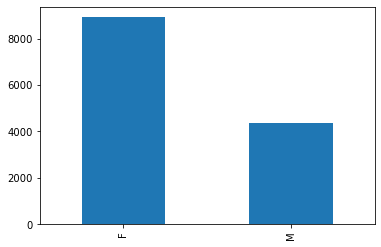

In [49]:
df_over_65_appts['Gender'].value_counts().plot(kind='bar');